In [32]:
import zlib
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def compress(data, repeat=10):
    """Compress a binary string using zlib and return the size of the compressed data."""
    repeated_data = data * repeat
    return len(zlib.compress(repeated_data.encode('utf-8')))

def interleave(str1, str2):
    """Interleave two binary strings."""
    return ''.join(x + y for x, y in zip(str1, str2))

def normalized_compression_distance(strategy1, strategy2):
    """Calculate the Normalized Compression Distance between two binary strategies."""
    c_x = compress(strategy1)
    c_y = compress(strategy2)
    c_xy = compress(strategy1 + strategy2)  # Concatenate both strategies for combined compression

    return (c_xy - min(c_x, c_y)) / max(c_x, c_y)

example_strategy_1 = '10010001'
example_strategy_2 = '00011001'

# Example usage with the given strategies
ncd_value = normalized_compression_distance(example_strategy_1, example_strategy_2)
ncd_value

0.11764705882352941

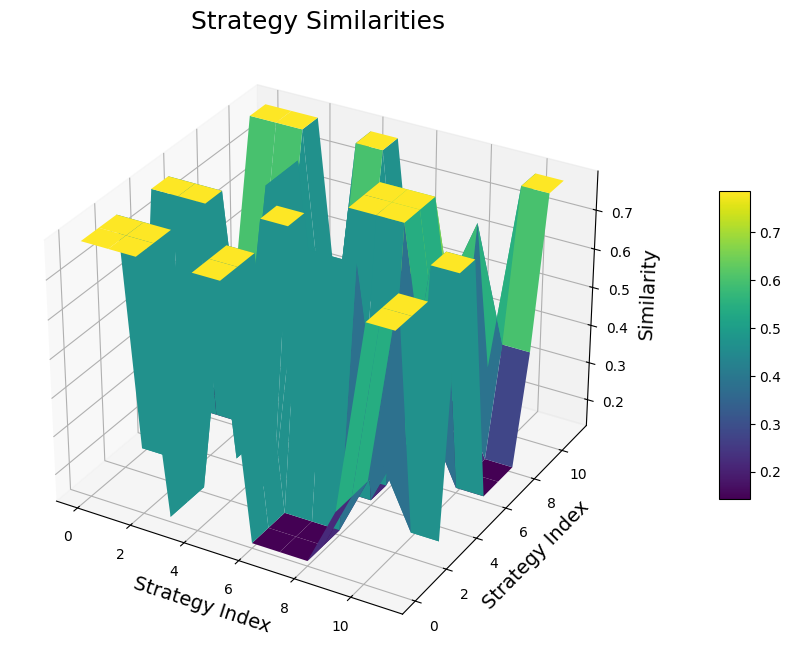

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zlib

def compress(data, repeat=10):
    """Compress a binary string using zlib and return the size of the compressed data."""
    repeated_data = data * repeat
    return len(zlib.compress(repeated_data.encode('utf-8')))

def interleave(str1, str2):
    """Interleave two binary strings."""
    return ''.join(x + y for x, y in zip(str1, str2))

def normalized_compression_distance(strategy1, strategy2):
    """Calculate the Normalized Compression Distance between two binary strategies."""
    c_x = compress(strategy1)
    c_y = compress(strategy2)
    c_xy = compress(strategy1 + strategy2)  # Concatenate both strategies for combined compression

    return (c_xy - min(c_x, c_y)) / max(c_x, c_y)

def always_cooperate(history):
    return '1'

def always_defect(history):
    return '0'

def tit_for_tat(history):
    if not history:
        return '1'
    return history[-1]

def anti_tit_for_tat(history):
    if not history:
        return '0'
    return history[-1]

def simulate_game(strategy1, strategy2, rounds=10):
    history1, history2 = [], []
    results1, results2 = [], []
    for _ in range(rounds):
        action1 = strategy1(history2)
        action2 = strategy2(history1)
        history1.append(action1)
        history2.append(action2)
        results1.append(action1)
        results2.append(action2)
    return ''.join(results1), ''.join(results2)

strategies = [always_cooperate, always_defect, tit_for_tat, anti_tit_for_tat]
data = []

for i, strategy1 in enumerate(strategies):
    for j, strategy2 in enumerate(strategies):
        if i <= j:
            results1, results2 = simulate_game(strategy1, strategy2, rounds=50)
            data.append(results1)
            data.append(results2)

ncd_matrix = []
for results1 in data:
    ncd_row = []
    for results2 in data:
        ncd = normalized_compression_distance(results1, results2)
        ncd_row.append(ncd)
    ncd_matrix.append(ncd_row)

similarity_matrix = 1 - np.array(ncd_matrix)

x = np.arange(similarity_matrix.shape[0])
y = np.arange(similarity_matrix.shape[1])
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, similarity_matrix, cmap='viridis')

ax.set_title('Strategy Similarities', fontsize=18)
ax.set_xlabel('Strategy Index', fontsize=14)
ax.set_ylabel('Strategy Index', fontsize=14)
ax.set_zlabel('Similarity', fontsize=14)
fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)

plt.show()
